In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./analy_2018-10-18_14.csv')
df.head()

,payout,clickid,pubid,postback_datetime,sub_campid,publisher_payout,click_ip,is_valid_pb,campid,subid,source,is_fraud,pubpb_filter,fraud_note,date,geo,click_datetime
0,0.32,4514261e-a562-4cbc-ae08-a3c1f24f5e05,10367,2018-10-18T00:05:12Z,NaN,0.32,119.149.13.142,True,56788327,20206392,313,0,0,ok,2018-10-18,KR,2018-10-18T00:04:28Z
1,0.45,9ea926f3-be46-4c03-8659-9fc391a847a7,10288,2018-10-18T00:05:13Z,NaN,0.58,176.59.47.208,True,56445559,1073,313,1,900,blacklist,2018-10-18,RU,2018-10-17T20:45:07Z
2,0.12,dc482d74-5791-4b92-813e-d2ea96c25ff2,10250,2018-10-18T00:05:14Z,NaN,0.14,202.62.19.171,True,58899694,1321,211,1,0,blacklist,2018-10-18,ID,2018-10-17T23:31:53Z
3,0.12,076f9ac4-a426-4024-8dc2-e01e9626af54,10541,2018-10-18T00:05:13Z,NaN,0.18,114.125.127.138,True,58899694,6e03183a1da0a26f946520b855f22dc4,211,0,0,ok,2018-10-18,ID,2018-10-17T23:38:23Z
4,0.12,055f4916-9157-451e-a5dd-67ca2d52ec45,10541,2018-10-18T00:05:13Z,NaN,0.18,182.1.171.183,True,58899694,b630df0b39ab3c6f97b51ccf97bc521d,211,1,0,blacklist,2018-10-18,ID,2018-10-17T23:36:39Z


In [148]:
dd=df.groupby(['date'])['payout','is_fraud','is_valid_pb'].aggregate(np.sum)
dd['payout'] = dd['payout'].round(decimals=1)
#dd['publisher_payout'] = dd['publisher_payout'].round(decimals=1)
dd['fraud_p'] = (dd['is_fraud']/dd['is_valid_pb']).round(decimals=2)
dd

,payout,is_fraud,is_valid_pb,fraud_p
date,,,,
2018-10-05,135187.5,25927,175365.0,0.15
2018-10-06,129695.0,24378,164078.0,0.15
2018-10-07,135451.8,25749,171002.0,0.15
2018-10-08,135843.4,26228,171132.0,0.15
2018-10-09,135046.7,27224,172516.0,0.16
2018-10-10,136808.7,27039,172581.0,0.16
2018-10-11,143530.2,24315,174607.0,0.14
2018-10-12,150782.5,22774,173734.0,0.13
2018-10-13,161970.2,23481,185316.0,0.13


In [142]:
total_payout = 1000
dd=df.groupby(['date', 'pubid'])['payout','is_fraud','is_valid_pb'].aggregate(np.sum)
dd['fraud_p'] = (dd['is_fraud']/dd['is_valid_pb']).round(decimals=2)
dd.query('payout > {}'.format(total_payout)).sort_values(by=['date','payout'], ascending=False).head(50)

payout  is_fraud  is_valid_pb  fraud_p
date       pubid                                            
2018-10-18 10224  9220.18240       653      10024.0     0.07
           10288  9036.36530       158       3707.0     0.04
           10219  8319.95445       340       6773.0     0.05
           10236  7755.52330      1019      12233.0     0.08
           10397  6592.31300       644      13429.0     0.05
           10418  6516.73375       263       4630.0     0.06
           10291  6348.07620       549       9319.0     0.06
           10408  4733.37460       328       5157.0     0.06
           10250  4727.18440       417       6620.0     0.06
           10316  4521.48950       595       8206.0     0.07
           10294  4516.69980       393       6065.0     0.06
           10305  4212.81670       355       6002.0     0.06
           10491  3981.98610       321       3921.0     0.08
           10367  3930.42850       642       6326.0     0.10
           10217  3896.75740       296       3353.0     0.09
           10548  3473.71400        20       1314.0     0.02
           10541  3420.10470       420       6920.0     0.06
           10396  3387.94150       173       3275.0     0.05
           10522  3128.53000       142        798.0     0.18
           10488  3006.43990       122       3550.0     0.03
           10310  2347.08310       319       5232.0     0.06
           10436  2284.66005       371       2543.0     0.15
           10318  2155.51780       113       1210.0     0.09
           10569  1871.39920       230       2459.0     0.09
           10302  1862.57850       335       3166.0     0.11
           10460  1744.94620       192       1865.0     0.10
           10425  1742.21400        56       1614.0     0.03
           10359  1425.17550         5        591.0     0.01
           10292  1314.40530       117       1364.0     0.09
           10454  1268.48900        93       1659.0     0.06
           10266  1141.53070       112       1092.0     0.10
2018-10-17 10224  9623.77840       932      11199.0     0.08
           10219  8383.44100       376       6376.0     0.06
           10236  7716.83790      1113      12591.0     0.09
           10418  7135.24845       278       5270.0     0.05
           10288  6743.32460       148       3088.0     0.05
           10291  6291.06330       671       9414.0     0.07
           10397  5766.32350       644      11682.0     0.06
           10408  5641.42820       402       6023.0     0.07
           10491  4283.99380       222       3473.0     0.06
           10316  4189.89295       580       7189.0     0.08
           10250  4035.61065       452       6428.0     0.07
           10305  4035.50540       415       6521.0     0.06
           10367  3999.13530       709       6510.0     0.11
           10294  3971.27000       369       5780.0     0.06
           10217  3906.38195       277       3097.0     0.09
           10488  3760.58780       114       3935.0     0.03
           10548  3648.81150        16       1324.0     0.01
           10541  3591.41670       486       7616.0     0.06
           10396  3258.63670       166       3203.0     0.05

In [122]:
c_date = '2018-10-17'
total_payout = 100
fraud_low_weight = 0.8
fraud_high_weight = 1.2

dd = df[df['date']==c_date]
#dd = df

In [123]:
fraud_avg = dd['is_fraud'].aggregate(np.sum)/dd['is_valid_pb'].size
fraud_avg

0.07392577097554787

In [124]:
dd = dd.groupby(['pubid'])['payout','is_fraud','is_valid_pb'].aggregate(np.sum)
dd['fraud_p'] = (dd['is_fraud']/dd['is_valid_pb']).round(decimals=2)

In [125]:
dd.query('payout > {} & fraud_p >= {}'.format(total_payout, fraud_avg*fraud_high_weight)).sort_values(by=['payout'], ascending=False)

,payout,is_fraud,is_valid_pb,fraud_p
pubid,,,,
10236,7716.83790,1113,12591.0,0.09
10367,3999.13530,709,6510.0,0.11
10217,3906.38195,277,3097.0,0.09
10522,2579.81750,122,693.0,0.18
10460,2300.37080,263,2204.0,0.12
10436,2016.89710,286,2125.0,0.13
10292,1755.06490,284,2304.0,0.12
10302,1603.88620,266,3033.0,0.09
10266,1083.78810,130,1019.0,0.13


In [126]:
dd.query('payout > {} & fraud_p <= {}'.format(total_payout, fraud_avg*fraud_low_weight)).sort_values(by=['payout'], ascending=False)

,payout,is_fraud,is_valid_pb,fraud_p
pubid,,,,
10418,7135.24845,278,5270.0,0.05
10288,6743.32460,148,3088.0,0.05
10488,3760.58780,114,3935.0,0.03
10548,3648.81150,16,1324.0,0.01
10396,3258.63670,166,3203.0,0.05
10310,2511.32540,331,6503.0,0.05
10359,1365.86900,4,530.0,0.01
10557,686.14700,20,818.0,0.02
10272,457.61180,24,519.0,0.05


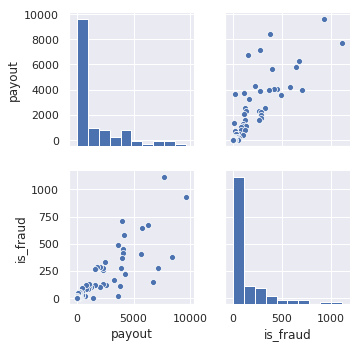

In [111]:
sns.pairplot(data[['payout', 'is_fraud']])

In [78]:
sns.boxplot(x='payout', y='fraud_p', data=data)

ValueError: Could not interpret input 'fraud_p'